<a href="https://colab.research.google.com/github/Root-0/CSE317-Lab/blob/main/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.


Degree 1 Polynomial Regression:
Coefficients (theta): [-18.78662117   8.63812258]
Training MSE: 289.6886
Test MSE: 160.6098


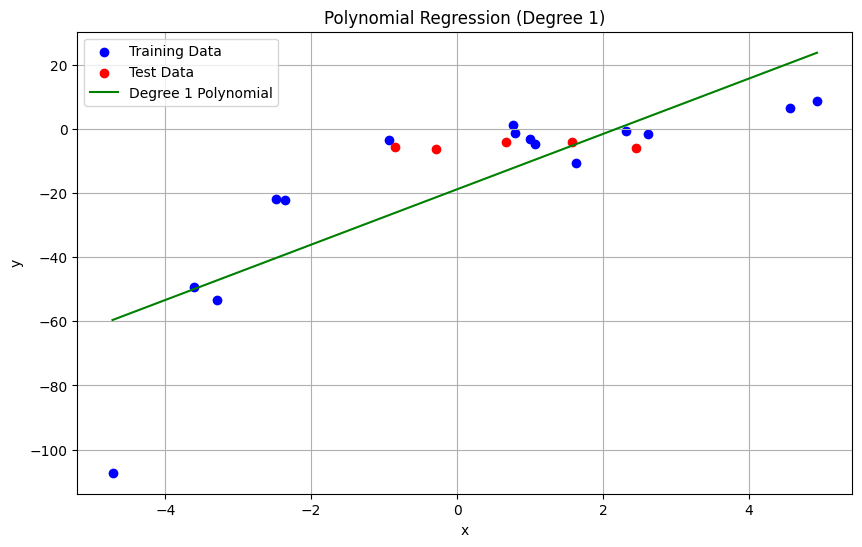


Degree 2 Polynomial Regression:
Coefficients (theta): [-5.52761529  8.8661636  -1.6333934 ]
Training MSE: 117.5862
Test MSE: 62.5135


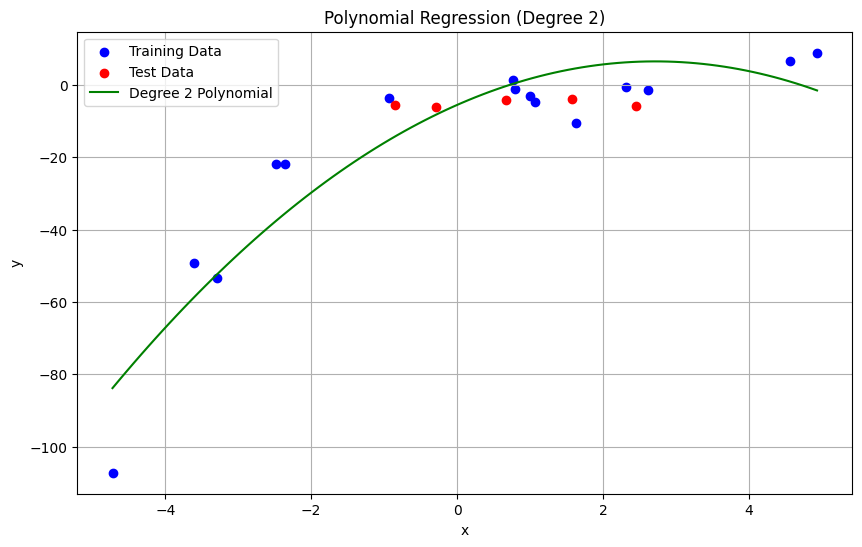


Degree 3 Polynomial Regression:
Coefficients (theta): [-1.20299581  0.90229132 -2.16144271  0.49967952]
Training MSE: 14.3516
Test MSE: 6.3784


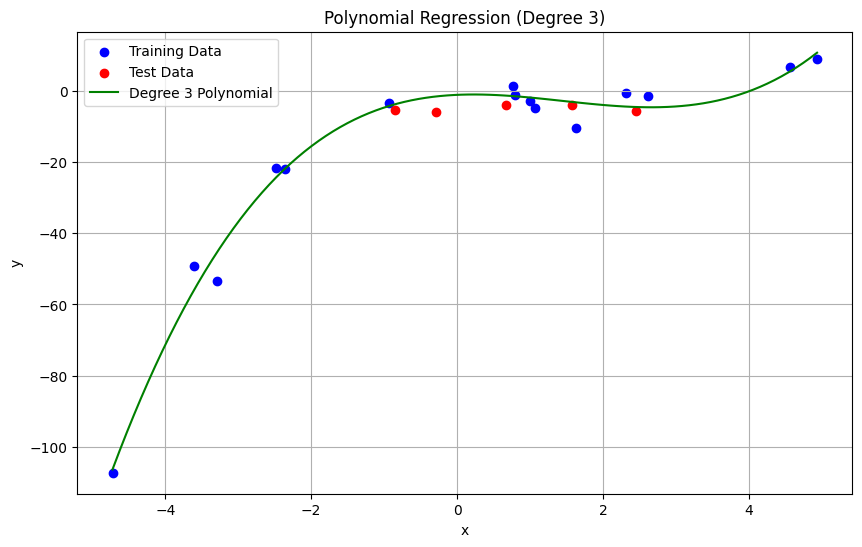


Model Comparison Summary:

Degree 1 Polynomial:
Training MSE: 289.6886
Test MSE: 160.6098

Degree 2 Polynomial:
Training MSE: 117.5862
Test MSE: 62.5135

Degree 3 Polynomial:
Training MSE: 14.3516
Test MSE: 6.3784


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """Load data from a text file"""
    return np.loadtxt(filename, delimiter=',')

def split_data(data, train_size=15, random_state=42):
    """Split data into training and test sets"""
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    train_data = data[train_indices]
    test_data = data[test_indices]

    return (train_data[:, 0], train_data[:, 1],
            test_data[:, 0], test_data[:, 1])

def create_polynomial_features(x, degree):
    """Create matrix X with polynomial features up to given degree"""
    n = len(x)
    X = np.ones((n, degree + 1))
    for d in range(1, degree + 1):
        X[:, d] = x ** d
    return X

def fit_polynomial(X, y):
    """Compute theta using normal equation"""
    return np.linalg.inv(X.T @ X) @ X.T @ y

def calculate_mse(X, y, theta):
    """Calculate Mean Squared Error"""
    predictions = X @ theta
    return np.mean((predictions - y) ** 2)

def plot_regression(x_train, y_train, x_test, y_test, degree, all_data):
    """Plot data and regression curve for given polynomial degree"""
    plt.figure(figsize=(10, 6))

    # Create and fit model
    X_train = create_polynomial_features(x_train, degree)
    theta = fit_polynomial(X_train, y_train)

    # Calculate MSE
    X_test = create_polynomial_features(x_test, degree)
    train_mse = calculate_mse(X_train, y_train, theta)
    test_mse = calculate_mse(X_test, y_test, theta)

    # Plot points
    plt.scatter(x_train, y_train, color='blue', label='Training Data')
    plt.scatter(x_test, y_test, color='red', label='Test Data')

    # Plot regression curve
    x_curve = np.linspace(min(all_data[:, 0]), max(all_data[:, 0]), 100)
    X_curve = create_polynomial_features(x_curve, degree)
    y_curve = X_curve @ theta

    plt.plot(x_curve, y_curve, color='green', label=f'Degree {degree} Polynomial')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    print(f"\nDegree {degree} Polynomial Regression:")
    print(f"Coefficients (theta): {theta}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")

    return train_mse, test_mse, theta

def run_analysis(filename):
    """Run complete polynomial regression analysis"""
    # Load data
    data = load_data(filename)

    # Split into training and test sets
    x_train, y_train, x_test, y_test = split_data(data)

    # Run analysis for all three degrees
    results = []
    for degree in [1, 2, 3]:
        train_mse, test_mse, theta = plot_regression(
            x_train, y_train, x_test, y_test, degree, data)
        results.append({
            'degree': degree,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'theta': theta
        })
        plt.show()

    # Print comparison summary
    print("\nModel Comparison Summary:")
    for result in results:
        print(f"\nDegree {result['degree']} Polynomial:")
        print(f"Training MSE: {result['train_mse']:.4f}")
        print(f"Test MSE: {result['test_mse']:.4f}")

# Run the analysis
if __name__ == "__main__":
    run_analysis('data.csv')